In [ ]:
'''
reference:https://github.com/Elwing-Chou、https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-5%E8%AC%9B-%E6%B1%BA%E7%AD%96%E6%A8%B9-decision-tree-%E4%BB%A5%E5%8F%8A%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97-random-forest-%E4%BB%8B%E7%B4%B9-7079b0ddfbda
隨機森林:使用很多不同的決策樹，再利用多數決定答案分類，決策樹必須每科都不相同，利用不全部相同的訓練資訊練(bagging)

'''

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#以Kaggle的鐵達尼資料練習
pd.set_option('display.max_rows',15)
df = pd.read_csv("train.csv")

In [3]:
#查看資料遺漏值:建模前先檢查資料完整度
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [5]:
#連續數值遺漏值處理1.mean()2.median()
#平均值易受極端值影響，採用中位數
df = df.fillna(df.mean())

In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#剩下Cabin 、Embarked ，Cabin遺漏值太多(687/891)直接放棄使用，Embarked出現三種值，這裡選用最常出現值
df = df.drop(['Cabin'],axis = 1)
#df['Embarked'].value_counts()
df['Embarked'].value_counts().idxmax()

'S'

In [9]:
#Ticket格式雜亂，且沒有直覺規律所以丟棄
df = df.drop(['Ticket'], axis = 1)

In [10]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].value_counts().idxmax())

In [11]:
#前處理完成
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [12]:
#特徵處理:文字型態通常選擇One-Hot Encoding，大多數機器學習只會處理數字
dummy = pd.get_dummies(df['Embarked'])
dummy

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
...,...,...,...
884,0,0,1
885,0,1,0


In [13]:
#concat連結dataframe axis = 1 水平連接
df = pd.concat([df,dummy], axis = 1 )
df = df.drop(['Embarked'], axis = 1)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,0,0,1
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,8.4583,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,51.8625,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,21.0750,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,11.1333,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,1,0,0


In [14]:
dummy = pd.get_dummies(df["Sex"])
df = pd.concat([df,dummy],axis = 1)
df = df.drop(["Sex"],axis = 1)
df.head(10)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,7.2500,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,71.2833,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,7.9250,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,53.1000,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,8.0500,0,0,1,0,1
5,6,0,3,"Moran, Mr. James",29.699118,0,0,8.4583,0,1,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.000000,0,0,51.8625,0,0,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.000000,3,1,21.0750,0,0,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,0,2,11.1333,0,0,1,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.000000,1,0,30.0708,1,0,0,1,0


In [15]:
#還剩Name有文字，觀察名子可發現稱謂似乎是有用的訊息(Mrs,Mr.,Ms. )

In [16]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html
n = df['Name'].str.split(",", expand = True)[1]
n = n.str.split(" ", expand = True)[1]
n.head(10)

0        Mr.
1       Mrs.
2      Miss.
3       Mrs.
4        Mr.
5        Mr.
6        Mr.
7    Master.
8       Mrs.
9       Mrs.
Name: 1, dtype: object

In [17]:
def name_filter(data):
    if data == 'Mr.' :
        return 'Mr'
    elif data == 'Mrs.':
        return 'Mrs'
    elif data == 'Miss.':
        return 'Miss'
    else:
        return 'Unknow'
df['Name'] = n.apply(name_filter)


In [18]:
#one-hot-encodeing
dummy = pd.get_dummies(df['Name'])
dummy

,Miss,Mr,Mrs,Unknow
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,0,1,0,0
5,0,1,0,0
6,0,1,0,0
...,...,...,...,...
884,0,1,0,0
885,0,0,1,0


In [19]:

df = pd.concat([df,dummy], axis = 1)
df = df.drop('Name', axis = 1)
df.drop('Unknow', axis = 1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Miss,Mr,Mrs
0,1,0,3,22.000000,1,0,7.2500,0,0,1,0,1,0,1,0
1,2,1,1,38.000000,1,0,71.2833,1,0,0,1,0,0,0,1
2,3,1,3,26.000000,0,0,7.9250,0,0,1,1,0,1,0,0
3,4,1,1,35.000000,1,0,53.1000,0,0,1,1,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,0,0,1,0,1,0,1,0
5,6,0,3,29.699118,0,0,8.4583,0,1,0,0,1,0,1,0
6,7,0,1,54.000000,0,0,51.8625,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,25.000000,0,0,7.0500,0,0,1,0,1,0,1,0
885,886,0,3,39.000000,0,5,29.1250,0,1,0,1,0,0,0,1


In [20]:
#丟除PassengerId，只是一個遞增數列
df = df.drop('PassengerId', axis = 1)
df = df.drop('Unknow', axis = 1)

In [21]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(df.drop(['Survived'], axis =1),df['Survived'],test_size=0.1)

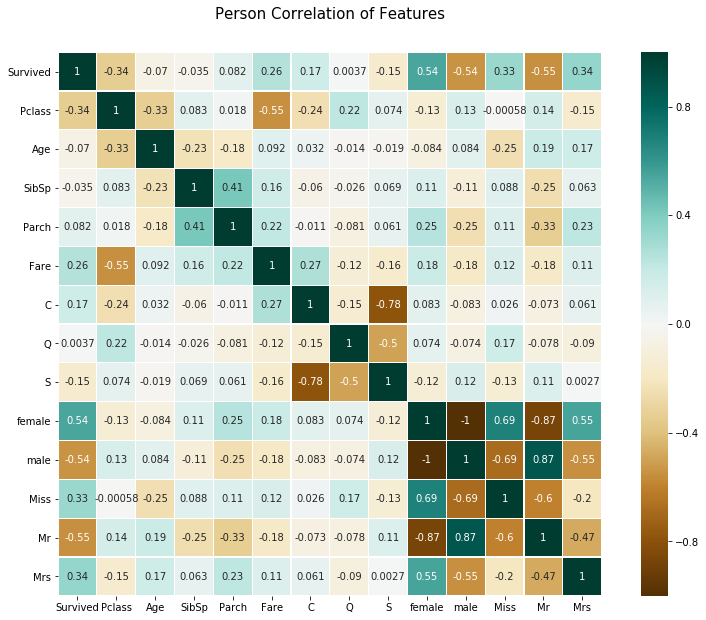

In [22]:
plt.figure(figsize=(14,10))
plt.title('Person Correlation of Features', y= 1.05, size= 15)
sns.heatmap(df.astype(float).corr(), cmap = "BrBG", linewidths=0.1,square=True, linecolor='White',annot=True )
#發現是女生容易存活，男生容易死掉

In [23]:
#使用ClassificationTree看看
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',max_depth=6)
clf = clf.fit(data_train,target_train)

In [24]:
from sklearn.metrics import accuracy_score
predict = clf.predict(data_test)
print("預測",predict)
print("正確標籤", list(target_test))
print("正確率:", accuracy_score(target_test, predict) * 100,"%")

預測 [0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1
 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1]
正確標籤 [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1]
正確率: 83.33333333333334 %


In [25]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Miss,Mr,Mrs
0,0,3,22.0,1,0,7.2500,0,0,1,0,1,0,1,0
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,1
2,1,3,26.0,0,0,7.9250,0,0,1,1,0,1,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,1,0,1,0


In [26]:
#使用RandomForset
from sklearn.ensemble import RandomForestClassifier
#n_estimators 產生幾棵樹，理論上越多越好但資料集不大就不需要太多
clf = RandomForestClassifier(n_estimators = 50, max_depth=7)

#交叉驗證會幫忙做fit,predict，cv 交叉驗證次數
from sklearn.model_selection import  cross_val_score
scores = cross_val_score(clf, df.drop(['Survived'], axis =1),df['Survived'], cv=20)
print("分數:",scores)
print("平均分數:",scores.mean())

分數: [0.69565217 0.91304348 0.82222222 0.84444444 0.73333333 0.75555556
 0.86666667 0.88888889 0.91111111 0.86363636 0.81818182 0.84090909
 0.77272727 0.86363636 0.77272727 0.75       0.81818182 0.88636364
 0.86363636 0.86363636]
平均分數: 0.827227711901625


In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 50, max_depth=7)
clf = clf.fit(df.drop(['Survived'],axis = 1),df['Survived'])

In [28]:
#開始測試test.csv
test_df = pd.read_csv("test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
test_df = pd.read_csv("test.csv")

result_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
result_df['PassengerId'] = test_df['PassengerId']
test_df = test_df.fillna(test_df.median())
test_df =test_df.drop(["Cabin"],axis =1)
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].value_counts().idxmax())
dummy = pd.get_dummies(test_df['Embarked'])

test_df = pd.concat([test_df,dummy], axis = 1 )
test_df = test_df.drop(['Embarked'], axis = 1)
test_df = test_df.drop(['Ticket'], axis = 1)
test_df = test_df.drop(['PassengerId'], axis = 1)


dummy = pd.get_dummies(test_df["Sex"])
test_df = pd.concat([test_df,dummy],axis = 1)
test_df= test_df.drop(["Sex"],axis = 1)

n = test_df['Name'].str.split(",", expand = True)[1]
n = n.str.split(" ", expand = True)[1]
def name_filter(data):
    if data == 'Mr.' :
        return 'Mr'
    elif data == 'Mrs.':
        return 'Mrs'
    elif data == 'Miss.':
        return 'Miss'
    else:
        return 'Unknow'
test_df['Name'] = n.apply(name_filter)

dummy = pd.get_dummies(test_df['Name'])
test_df = pd.concat([test_df,dummy], axis = 1)
test_df = test_df.drop(['Name'], axis = 1)
test_df = test_df.drop(['Unknow'], axis = 1)

predict = clf.predict(test_df)

In [30]:
result_df['Survived'] = predict
result_df
#result_df.to_csv("titanic_result.csv", index = False)
#可以存檔去Kaggle比賽

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
...,...,...
411,1303,1
412,1304,0
